Run LDA on some Wikipedia articles with "known" themes.  Will pull 10 articles across 5 "topics" that are rather different from each other:

- Chemistry
- Authors
- Actors/Actresses
- Arkansas cities
- Fruits

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import wikipedia
from string import punctuation

In [84]:
# Install nltk things
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kenneth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kenneth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kenneth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kenneth/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

# Get Wikipedia articles

In [3]:
# Wikipedia fetching
def get_page(title):
    return wikipedia.page(title, auto_suggest=False, redirect=False)

In [4]:
chemistry_titles = [
    'atom',
    'matter',
    'electron',
    'molecule',
    'phase (matter)',
    'chemical bond',
    'ion',
    'base (chemistry)',
    'chemical reaction',
    'energy'
]

In [16]:
articles = {
    x: get_page(x)
    for x in chemistry_titles
}

In [17]:
articles

{'atom': <WikipediaPage 'Atom'>,
 'matter': <WikipediaPage 'Matter'>,
 'electron': <WikipediaPage 'Electron'>,
 'molecule': <WikipediaPage 'Molecule'>,
 'phase (matter)': <WikipediaPage 'Phase (matter)'>,
 'chemical bond': <WikipediaPage 'Chemical bond'>,
 'ion': <WikipediaPage 'Ion'>,
 'base (chemistry)': <WikipediaPage 'Base (chemistry)'>,
 'chemical reaction': <WikipediaPage 'Chemical reaction'>,
 'energy': <WikipediaPage 'Energy'>}

In [18]:
# Inspect one
articles['atom'].content

'An atom is the smallest unit of ordinary matter that forms a chemical element. Every solid, liquid, gas, and plasma is composed of neutral or ionized atoms. Atoms are extremely small, typically around 100 picometers across. They are so small that accurately predicting their behavior using classical physics—as if they were tennis balls, for example—is not possible due to quantum effects.\nEvery atom is composed of a nucleus and one or more electrons bound to the nucleus. The nucleus is made of one or more protons and a number of neutrons. Only the most common variety of hydrogen has no neutrons. More than 99.94% of an atom\'s mass is in the nucleus. The protons have a positive electric charge, the electrons have a negative electric charge, and the neutrons have no electric charge. If the number of protons and electrons are equal, then the atom is electrically neutral. If an atom has more or fewer electrons than protons, then it has an overall negative or positive charge, respectively –

# Clean text

- Lowercase
- Tokenize
- Remove any non-alpha character
    - This is arguably a bit extreme, but deals well enough with punctuation and some other oddities from scraping Wikipedia like `===` to delineate sections
- Remove stopwords
- Lemmatize

In [85]:
# Helper functions
lemmatizer = WordNetLemmatizer()
punctuation = list(punctuation) + ['\n']

def clean_text(page):    
    # Lowercase
    text = page.content.lower()
    
    # Tokenize
    text = nltk.tokenize.word_tokenize(text)
    
    # Remove punctuation and stopwords
    text = [
        lemmatizer.lemmatize(x) for x in text 
        if x.isalpha()
            and x not in stopwords.words('english')
        #if x not in punctuation
    ]
    
    return text

In [86]:
# Inspect one
clean_text(articles['atom'])[:20]

['atom',
 'smallest',
 'unit',
 'ordinary',
 'matter',
 'form',
 'chemical',
 'element',
 'every',
 'solid',
 'liquid',
 'gas',
 'plasma',
 'composed',
 'neutral',
 'ionized',
 'atom',
 'atom',
 'extremely',
 'small']

In [87]:
# Run for all articles
docs = [
    clean_text(v)
    for k, v in articles.items()
]

# Topic model

In [69]:
# Get document-topic matrix
def get_document_topic_matrix(model, bow, minimum_probability):
    x = []
    for d in bow:
        # Get document's topics
        doc_topics = lda.get_document_topics(d, minimum_probability=minimum_probability)
        
        # Extract just the document-topic probabilities
        x.append([i[1] for i in doc_topics])

    return x

In [88]:
# Create dictionary
dic = corpora.Dictionary(docs)

# Create bow matrix
bow = [dic.doc2bow(doc) for doc in docs]

# Inspect
bow

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 2),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 3),
  (25, 1),
  (26, 3),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 3),
  (32, 1),
  (33, 2),
  (34, 4),
  (35, 2),
  (36, 3),
  (37, 2),
  (38, 2),
  (39, 1),
  (40, 2),
  (41, 14),
  (42, 11),
  (43, 6),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 5),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 3),
  (53, 1),
  (54, 1),
  (55, 5),
  (56, 1),
  (57, 3),
  (58, 1),
  (59, 1),
  (60, 5),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 2),
  (67, 2),
  (68, 3),
  (69, 1),
  (70, 1),
  (71, 5),
  (72, 1),
  (73, 1),
  (74, 5),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 163),
  (87, 60),
  (88, 3),
  (89, 1),
  (90, 1),
  (9

In [107]:
# Train model
lda = gensim.models.ldamodel.LdaModel(
    bow,
    num_topics=7,
    id2word = dic,
    passes=50,
    random_state=666
)

In [108]:
# Inspect topics
lda.show_topics()

[(0,
  '0.000*"energy" + 0.000*"atom" + 0.000*"electron" + 0.000*"particle" + 0.000*"reaction" + 0.000*"bond" + 0.000*"molecule" + 0.000*"one" + 0.000*"matter" + 0.000*"system"'),
 (1,
  '0.052*"phase" + 0.019*"liquid" + 0.017*"water" + 0.011*"temperature" + 0.010*"equilibrium" + 0.009*"pressure" + 0.009*"state" + 0.009*"point" + 0.008*"solid" + 0.007*"separate"'),
 (2,
  '0.032*"energy" + 0.026*"electron" + 0.019*"reaction" + 0.007*"particle" + 0.007*"charge" + 0.007*"ion" + 0.006*"chemical" + 0.006*"system" + 0.006*"form" + 0.006*"atom"'),
 (3,
  '0.042*"bond" + 0.030*"molecule" + 0.029*"atom" + 0.020*"electron" + 0.015*"chemical" + 0.013*"bonding" + 0.013*"ionic" + 0.013*"ion" + 0.013*"covalent" + 0.011*"two"'),
 (4,
  '0.000*"electron" + 0.000*"reaction" + 0.000*"atom" + 0.000*"bond" + 0.000*"particle" + 0.000*"molecule" + 0.000*"chemical" + 0.000*"energy" + 0.000*"one" + 0.000*"charge"'),
 (5,
  '0.054*"base" + 0.022*"hydroxide" + 0.022*"acid" + 0.014*"water" + 0.013*"ion" + 0.008

In [109]:
# Document-topic matrix
np.round(get_document_topic_matrix(lda, bow, 1e-20), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.83, 0.  , 0.  , 0.  , 0.17],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.18, 0.82, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.9 , 0.1 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.01, 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [140]:
# For each article, print out the top 5 words for each likely topic
for i, k in enumerate(articles.keys()):
    print(k)
    
    doc_topics = lda.get_document_topics(bow[i], minimum_probability=0.05)
    # Sort topics by probability
    doc_topics.sort(key=lambda x: x[1], reverse=True)
    
    for d in doc_topics:
        prob = d[1]
        terms = lda.get_topic_terms(d[0], 5)
        l = []
        for t in terms:
            l.append(dic[t[0]])
        
        print(f'{prob:.2f}:', ', '.join(l))
        
    print()

atom
1.00: matter, atom, electron, particle, mass

matter
1.00: matter, atom, electron, particle, mass

electron
0.83: energy, electron, reaction, particle, charge
0.17: matter, atom, electron, particle, mass

molecule
1.00: bond, molecule, atom, electron, chemical

phase (matter)
1.00: phase, liquid, water, temperature, equilibrium

chemical bond
0.82: bond, molecule, atom, electron, chemical
0.18: energy, electron, reaction, particle, charge

ion
0.90: energy, electron, reaction, particle, charge
0.10: bond, molecule, atom, electron, chemical

base (chemistry)
1.00: base, hydroxide, acid, water, ion

chemical reaction
0.99: energy, electron, reaction, particle, charge

energy
1.00: energy, electron, reaction, particle, charge



In [92]:
# "Optimal" number of topics based on coherence
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(f'{num_topics} topics')
        model = gensim.models.ldamodel.LdaModel(
            corpus,
            num_topics=num_topics,
            id2word = dic,
            passes=50,
            random_state=666
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary) #, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [93]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(
    dictionary=dic,
    corpus=bow,
    texts=docs,
    start=1,
    limit=20,
    step=1
)

1 topics
2 topics
3 topics
4 topics
5 topics
6 topics
7 topics
8 topics
9 topics
10 topics
11 topics
12 topics
13 topics
14 topics
15 topics
16 topics
17 topics
18 topics
19 topics


<AxesSubplot:>

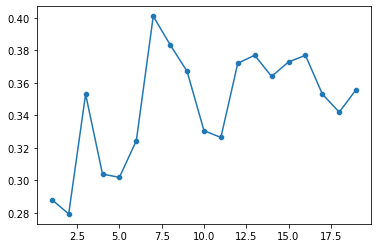

In [101]:
sns.lineplot(
    x=range(1, 20, 1),
    y=coherence_values
)
sns.scatterplot(
    x=range(1, 20, 1),
    y=coherence_values
)

In [154]:
sorted(dic.cfs.items(), key=lambda x: x[1], reverse=True)[:50]

[(402, 594),
 (424, 529),
 (86, 401),
 (747, 292),
 (1018, 274),
 (906, 250),
 (785, 203),
 (145, 199),
 (871, 177),
 (194, 173),
 (647, 170),
 (739, 166),
 (513, 161),
 (1285, 141),
 (846, 139),
 (986, 136),
 (849, 133),
 (189, 133),
 (448, 130),
 (2994, 127),
 (1176, 125),
 (1225, 111),
 (165, 105),
 (87, 104),
 (42, 104),
 (406, 101),
 (921, 101),
 (1316, 100),
 (1344, 95),
 (981, 92),
 (825, 85),
 (512, 85),
 (186, 80),
 (972, 79),
 (997, 78),
 (190, 76),
 (349, 76),
 (1240, 76),
 (493, 75),
 (1070, 74),
 (1382, 74),
 (748, 72),
 (1229, 72),
 (998, 71),
 (766, 70),
 (671, 69),
 (1286, 69),
 (1203, 67),
 (543, 65),
 (635, 65)]

<AxesSubplot:>

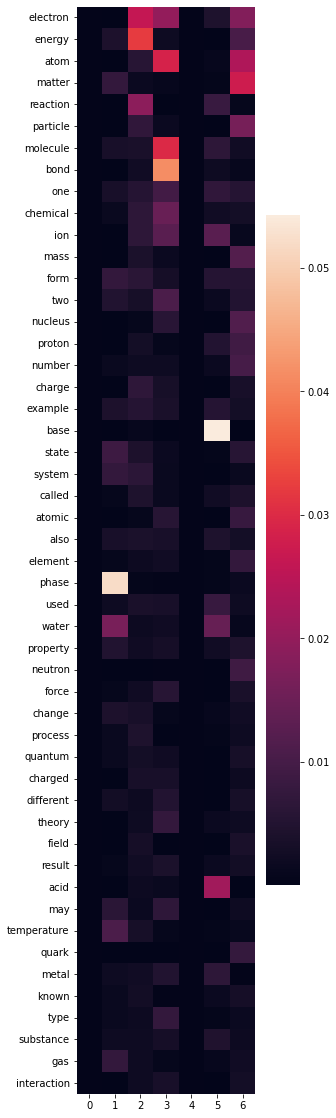

In [166]:
# Topic-term matrix as heatmap
most_common_words = [k for k, v in sorted(dic.cfs.items(), key=lambda x: x[1], reverse=True)[:50]]
words = [dic[k] for k in most_common_words]
#words_alphabetical_index = np.argsort(words)
#words_alphabetical = [words[i] for i in words_alphabetical_index]

plt.figure(figsize=(4, 20))
sns.heatmap(
    lda.get_topics()[:, most_common_words].transpose(),
    yticklabels=words
)

In [162]:
lda.get_topics()[:, words_alphabetical_index]

array([[2.35627900e-04, 2.35626663e-04, 2.35625877e-04, 2.35631363e-04,
        2.35628118e-04, 2.35626838e-04, 2.35626081e-04, 2.35627303e-04,
        2.35626023e-04, 2.35626023e-04, 2.35626590e-04, 2.35628657e-04,
        2.35628235e-04, 2.35625484e-04, 2.35627478e-04, 2.35626416e-04,
        2.35627114e-04, 2.35626838e-04, 2.35626081e-04, 2.35626081e-04,
        2.35625703e-04, 2.35626940e-04, 2.35625586e-04, 2.35626983e-04,
        2.35627187e-04, 2.35630578e-04, 2.35630578e-04, 2.35626081e-04,
        2.35625514e-04, 2.35627362e-04, 2.35625586e-04, 2.35625484e-04,
        2.35626576e-04, 2.35626343e-04, 2.35626401e-04, 2.35625557e-04,
        2.35626692e-04, 2.35626547e-04, 2.35630941e-04, 2.35626969e-04,
        2.35625950e-04, 2.35628118e-04, 2.35634827e-04, 2.35626081e-04,
        2.35651547e-04, 2.35626270e-04, 2.35631014e-04, 2.35626794e-04,
        2.35625703e-04, 2.35625514e-04],
       [7.59609276e-04, 9.49728419e-05, 9.49726673e-05, 9.49742534e-05,
        9.49735258e-05,

In [142]:
# Topic-term matrix as heatmap
words = list(dic.values())
words_alphabetical_index = np.argsort(words)
words_alphabetical = [words[i] for i in words_alphabetical_index]

plt.figure(figsize=(20, 4))
sns.heatmap(
    lda.get_topics()[:, words_alphabetical_index],
    xticklabels=words_alphabetical
)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f1f282050e0> (for post_execute):


KeyboardInterrupt: 

In [22]:
get_page('apple').content

'An apple is an edible fruit produced by an apple tree (Malus domestica). Apple trees are cultivated worldwide and are the most widely grown species in the genus Malus. The tree originated in Central Asia, where its wild ancestor, Malus sieversii, is still found today. Apples have been grown for thousands of years in Asia and Europe and were brought to North America by European colonists. Apples have religious and mythological significance in many cultures, including Norse, Greek, and European Christian tradition.\nApples grown from seed tend to be very different from those of their parents, and the resultant fruit frequently lacks desired characteristics. Generally, apple cultivars are propagated by clonal grafting onto rootstocks. Apple trees grown without rootstocks tend to be larger and much slower to fruit after planting. Rootstocks are used to control the speed of growth and the size of the resulting tree, allowing for easier harvesting.\nThere are more than 7,500 known cultivars

In [23]:
get_page('apple').categories

['All accuracy disputes',
 'All pages needing factual verification',
 'Apples',
 'Articles containing French-language text',
 'Articles containing Middle English (1100-1500)-language text',
 'Articles containing Old English (ca. 450-1100)-language text',
 'Articles containing Proto-Germanic-language text',
 'Articles containing Proto-Indo-European-language text',
 "Articles with 'species' microformats",
 'Articles with J9U identifiers',
 'Articles with LCCN identifiers',
 'Articles with NARA identifiers',
 'Articles with NDL identifiers',
 'Articles with disputed statements from December 2017',
 'Articles with hAudio microformats',
 'Articles with short description',
 'CS1 Spanish-language sources (es)',
 'CS1 errors: missing periodical',
 'Commons category link is on Wikidata',
 'Fruits originating in Asia',
 'Good articles',
 'Malus',
 'Plants described in 1768',
 'Short description is different from Wikidata',
 'Taxonbars desynced from Wikidata',
 'Taxonbars on possible non-taxon pa

In [7]:
page_object = wikipedia.page("apple")

page_object

<WikipediaPage 'Apply'>

In [13]:
print(wikipedia.search('apple', results=10))

['Apple', 'Apple Inc.', 'Apple (disambiguation)', 'IPhone', 'MacOS', 'IOS', 'Apple Watch', 'Apple Music', 'Apple silicon', 'Apple TV+']


In [14]:
wikipedia.suggest("Apple")

'apply'

In [18]:
wikipedia.page("physics", auto_suggest=False)

<WikipediaPage 'Physics'>

In [16]:
wikipedia.summary("Wikipedia")

'Wikimedia Foundation, Inc. (WMF, also colloquially referred to as Wikimedia) is a 501(c)(3) nonprofit organization headquartered in San Francisco, California, registered as a foundation under US law. It owns and operates the Wikimedia projects.It was established in 2003 by Jimmy Wales as a way to fund Wikipedia and its sibling projects through non-profit means. As of 2021, it employs over 550 staff and contractors, with annual revenues in excess of US$150 million.'

In [11]:
wikipedia.summary("physics")

DisambiguationError: "physical" may refer to: 
Physical examination
Physical (Olivia Newton-John album)
"Physical" (Olivia Newton-John song)
Physical (Gabe Gurnsey album)
"Physical" (Alcazar song)
"Physical" (Enrique Iglesias song)
"Physical" (Dua Lipa song)
Dog Eat Dog
Physical (TV series)
All pages with titles beginning with Physical
All pages with titles containing Physical